In [1]:
import pandas as pd 

In [3]:
tidy_data = pd.read_excel("complete_project4.xlsx" , index_col = 0 ,parse_dates = True)

In [4]:
tidy_data

,Order Date,Shipmode,Segment,Sales
Order Id,,,,
CA-2011-103366,2013-01-15,First Class,Consumer,149.950
CA-2011-109043,2013-08-15,First Class,Consumer,243.600
CA-2011-113166,2013-12-24,First Class,Consumer,9.568
CA-2011-124023,2013-04-07,First Class,Consumer,8.960
CA-2011-130155,2013-05-19,First Class,Consumer,34.200
...,...,...,...,...
US-2014-129224,2016-03-17,Standard Class,Home Office,4.608
US-2014-132031,2016-04-23,Standard Class,Home Office,513.496
US-2014-132297,2016-05-27,Standard Class,Home Office,598.310


In [5]:
# Long to wide table format

In [6]:
# filter for  consumer data only

consumer = tidy_data [tidy_data["Segment"] == "Consumer"]

In [7]:
consumer

,Order Date,Shipmode,Segment,Sales
Order Id,,,,
CA-2011-103366,2013-01-15,First Class,Consumer,149.950
CA-2011-109043,2013-08-15,First Class,Consumer,243.600
CA-2011-113166,2013-12-24,First Class,Consumer,9.568
CA-2011-124023,2013-04-07,First Class,Consumer,8.960
CA-2011-130155,2013-05-19,First Class,Consumer,34.200
...,...,...,...,...
US-2014-152842,2016-07-16,Standard Class,Consumer,242.352
US-2014-152898,2016-09-11,Standard Class,Consumer,67.900
US-2014-165953,2016-01-01,Standard Class,Consumer,71.096


In [8]:
# use 2 measurements for each shipmode
consumer_subset = consumer.sort_index().groupby(["Shipmode"]).head(2)

In [9]:
consumer_subset

,Order Date,Shipmode,Segment,Sales
Order Id,,,,
CA-2011-100706,2013-12-16,Same Day,Consumer,129.44
CA-2011-100895,2013-06-02,Standard Class,Consumer,605.47
CA-2011-101266,2013-08-27,Second Class,Consumer,13.36
CA-2011-103366,2013-01-15,First Class,Consumer,149.95
CA-2011-104283,2013-06-27,Standard Class,Consumer,616.14
CA-2011-109043,2013-08-15,First Class,Consumer,243.60
CA-2011-109232,2013-01-13,Second Class,Consumer,545.94
CA-2011-113047,2013-10-24,Same Day,Consumer,11.85


In [10]:
# putting the values for the 4 shipmodes as seperate columns next to each other
consumer_subset.pivot(columns =  "Shipmode" , values = "Sales")

Shipmode,First Class,Same Day,Second Class,Standard Class
Order Id,,,,
CA-2011-100706,NaN,129.44,NaN,NaN
CA-2011-100895,NaN,NaN,NaN,605.47
CA-2011-101266,NaN,NaN,13.36,NaN
CA-2011-103366,149.95,NaN,NaN,NaN
CA-2011-104283,NaN,NaN,NaN,616.14
CA-2011-109043,243.60,NaN,NaN,NaN
CA-2011-109232,NaN,NaN,545.94,NaN
CA-2011-113047,NaN,11.85,NaN,NaN


In [11]:
consumer

,Order Date,Shipmode,Segment,Sales
Order Id,,,,
CA-2011-103366,2013-01-15,First Class,Consumer,149.950
CA-2011-109043,2013-08-15,First Class,Consumer,243.600
CA-2011-113166,2013-12-24,First Class,Consumer,9.568
CA-2011-124023,2013-04-07,First Class,Consumer,8.960
CA-2011-130155,2013-05-19,First Class,Consumer,34.200
...,...,...,...,...
US-2014-152842,2016-07-16,Standard Class,Consumer,242.352
US-2014-152898,2016-09-11,Standard Class,Consumer,67.900
US-2014-165953,2016-01-01,Standard Class,Consumer,71.096


<AxesSubplot:xlabel='Order Id'>

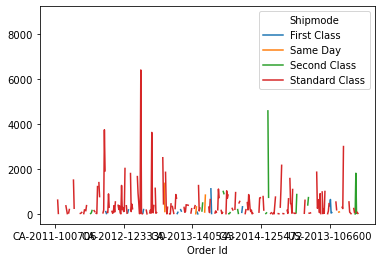

In [12]:
consumer.pivot(columns ="Shipmode" , values="Sales").plot()

In [13]:
# Pivot table

In [14]:
tidy_data

,Order Date,Shipmode,Segment,Sales
Order Id,,,,
CA-2011-103366,2013-01-15,First Class,Consumer,149.950
CA-2011-109043,2013-08-15,First Class,Consumer,243.600
CA-2011-113166,2013-12-24,First Class,Consumer,9.568
CA-2011-124023,2013-04-07,First Class,Consumer,8.960
CA-2011-130155,2013-05-19,First Class,Consumer,34.200
...,...,...,...,...
US-2014-129224,2016-03-17,Standard Class,Home Office,4.608
US-2014-132031,2016-04-23,Standard Class,Home Office,513.496
US-2014-132297,2016-05-27,Standard Class,Home Office,598.310


In [15]:
# I want the mean sales for segments of consumer and corporate  in each of the shipmodes
tidy_data.pivot_table(
    values = "Sales",
    index = "Shipmode",
    columns = "Segment",
    aggfunc= "mean"
)

Segment,Consumer,Corporate,Home Office
Shipmode,,,
First Class,288.919069,519.815175,644.815500
Same Day,284.891345,1981.461600,496.242667
Second Class,551.053494,704.864620,382.222913
Standard Class,462.142824,368.044648,608.318139


In [18]:
# the alternative way is 
tidy_data.groupby(["Segment" ,"Shipmode"]).mean()

Sales
Segment     Shipmode                   
Consumer    First Class      288.919069
            Same Day         284.891345
            Second Class     551.053494
            Standard Class   462.142824
Corporate   First Class      519.815175
            Same Day        1981.461600
            Second Class     704.864620
            Standard Class   368.044648
Home Office First Class      644.815500
            Same Day         496.242667
            Second Class     382.222913
            Standard Class   608.318139

In [24]:
# Wide to long format
consumer_pivoted = consumer.pivot(columns ="Shipmode" ,values = "Sales").reset_index()

In [25]:
consumer_pivoted

Shipmode,Order Id,First Class,Same Day,Second Class,Standard Class
0,CA-2011-100706,NaN,129.44,NaN,NaN
1,CA-2011-100895,NaN,NaN,NaN,605.470
2,CA-2011-101266,NaN,NaN,13.36,NaN
3,CA-2011-103366,149.95,NaN,NaN,NaN
4,CA-2011-104283,NaN,NaN,NaN,616.140
...,...,...,...,...,...
439,US-2014-163195,NaN,NaN,29.16,NaN
440,US-2014-165953,NaN,NaN,NaN,71.096
441,US-2014-166233,NaN,NaN,NaN,24.000
442,US-2014-167920,NaN,NaN,1827.51,NaN


In [27]:
consumer = consumer_pivoted.melt(id_vars = "Order Id")

In [28]:
consumer

,Order Id,Shipmode,value
0,CA-2011-100706,First Class,NaN
1,CA-2011-100895,First Class,NaN
2,CA-2011-101266,First Class,NaN
3,CA-2011-103366,First Class,149.950
4,CA-2011-104283,First Class,NaN
...,...,...,...
1771,US-2014-163195,Standard Class,NaN
1772,US-2014-165953,Standard Class,71.096
1773,US-2014-166233,Standard Class,24.000
1774,US-2014-167920,Standard Class,NaN


In [29]:
consumer = consumer_pivoted.melt(
    id_vars = "Order Id",
    value_vars = ["First Class" ,"Same Day" ,"Second Class" ,"Standard Class"],
    value_name = "Consumer",
    var_name ="Shipmode"
)

In [30]:
consumer

,Order Id,Shipmode,Consumer
0,CA-2011-100706,First Class,NaN
1,CA-2011-100895,First Class,NaN
2,CA-2011-101266,First Class,NaN
3,CA-2011-103366,First Class,149.950
4,CA-2011-104283,First Class,NaN
...,...,...,...
1771,US-2014-163195,Standard Class,NaN
1772,US-2014-165953,Standard Class,71.096
1773,US-2014-166233,Standard Class,24.000
1774,US-2014-167920,Standard Class,NaN
